## f) Machine Learning Applications

The following research questions were addressed using machine learning techniques to derive insights and solutions.

### Question 9(a). **Predicting Future Emissions**
**(a)** Can we predict the greenhouse gas emissions for a specific industry and region in the next quarter given the historical data?

In [ ]:
df

,Country,Industry,Gas_Type,Seasonal_Adjustment,2010Q1,2010Q2,2010Q3,2010Q4,2011Q1,2011Q2,...,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2
ObjectId,,,,,,,,,,,,,,,,,,,,,
1,Advanced Economies,"Agriculture, Forestry and Fishing",Carbon dioxide,Not Seasonally Adjusted,43.908353,48.159155,51.673939,50.657046,43.155711,48.817930,...,42.293087,47.748460,48.483400,48.913728,43.093510,44.589169,50.266832,46.571090,42.771544,45.825663
2,Advanced Economies,"Agriculture, Forestry and Fishing",Carbon dioxide,Seasonally Adjusted,47.679026,48.234737,49.320131,49.164598,46.906412,48.898925,...,46.520021,48.294118,45.447285,47.177251,47.193073,45.246694,47.181772,44.899062,46.544811,46.207766
3,Advanced Economies,"Agriculture, Forestry and Fishing",Fluorinated gases,Not Seasonally Adjusted,0.212131,0.224242,0.226385,0.238086,0.234061,0.238762,...,0.172660,0.173625,0.178046,0.177866,0.178430,0.172420,0.176661,0.179536,0.193959,0.170805
4,Advanced Economies,"Agriculture, Forestry and Fishing",Fluorinated gases,Seasonally Adjusted,0.215602,0.224063,0.229889,0.231290,0.236694,0.239571,...,0.174595,0.177234,0.177765,0.172601,0.177953,0.177223,0.176762,0.175108,0.190814,0.176155
5,Advanced Economies,"Agriculture, Forestry and Fishing",Greenhouse gas,Not Seasonally Adjusted,419.438647,299.347785,279.993858,371.250812,416.774671,297.347598,...,419.933179,299.875618,270.228400,354.486753,412.374069,290.379215,265.027769,362.769846,397.293833,291.778769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,World,"Water supply; sewerage, waste management and r...",Greenhouse gas,Seasonally Adjusted,538.286032,548.193145,556.945607,559.158396,554.820930,560.314225,...,660.191107,652.237254,651.307198,666.534927,669.802354,669.830231,669.944244,665.656913,669.908079,673.158810
2383,World,"Water supply; sewerage, waste management and r...",Methane,Not Seasonally Adjusted,481.608740,477.213946,476.760236,494.054063,495.563677,488.930825,...,596.513573,565.945209,559.893843,589.607885,605.522454,581.993922,579.114489,585.758302,603.094598,586.828408
2384,World,"Water supply; sewerage, waste management and r...",Methane,Seasonally Adjusted,471.499223,479.855253,487.853935,490.428574,485.955961,491.206303,...,580.778619,572.941766,571.795817,586.444307,588.909896,589.349703,589.024948,585.104621,588.772228,591.688531


For Q9(a) We will need to import few libraries

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
for index, row in df.iterrows():
    industry = row['Industry']
    region = row['Country']
    gt = row['Gas_Type']
    sa = row['Seasonal_Adjustment']

    # Get the emissions data for this industry and region
    emissions_data = row['2010Q1':'2023Q2']

    # Prepare the data for the model
    X = np.array(range(len(emissions_data))).reshape(-1, 1)  # The time steps (e.g., 0, 1, 2, ...)
    y = emissions_data.values  # The emissions data

    # Train the model
    model = LinearRegression()
    model.fit(X, y)

    # Predict the emissions for the next quarter
    next_quarter = len(emissions_data)
    prediction = model.predict(np.array([next_quarter]).reshape(-1, 1))

    print(f"The predicted emissions for {industry}, {gt}, {sa} in {region} for the next quarter is {prediction[0]} MTCO2e.")


The predicted emissions for Agriculture, Forestry and Fishing, Carbon dioxide, Not Seasonally Adjusted in Advanced Economies for the next quarter is 46.011821675045425 MTCO2e.
The predicted emissions for Agriculture, Forestry and Fishing, Carbon dioxide, Seasonally Adjusted in Advanced Economies for the next quarter is 46.04199099987421 MTCO2e.
The predicted emissions for Agriculture, Forestry and Fishing, Fluorinated gases, Not Seasonally Adjusted in Advanced Economies for the next quarter is 0.1794123197798742 MTCO2e.
The predicted emissions for Agriculture, Forestry and Fishing, Fluorinated gases, Seasonally Adjusted in Advanced Economies for the next quarter is 0.1791560490419287 MTCO2e.
The predicted emissions for Agriculture, Forestry and Fishing, Greenhouse gas, Not Seasonally Adjusted in Advanced Economies for the next quarter is 336.35804454304684 MTCO2e.
The predicted emissions for Agriculture, Forestry and Fishing, Greenhouse gas, Seasonally Adjusted in Advanced Economies fo


### Question 9(b). **Predicting Future Emissions**
 **(b)** What will be Forcasted Values for New 2023Q3, 2023Q4 & 2024Q1 Columns?

Importing ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

Creating '2023Q3'

In [ ]:
for series_name in df.index:
    # Prepare training data
    train_data = df.loc[series_name].iloc[4:-1].astype(float)

    # Fit the ARIMA model
    model = ARIMA(train_data, order=(5,1,0))
    model_fit = model.fit()

    # Forecast
    n_periods = 3
    forecast, stderr, conf_int = model_fit.forecast(steps=n_periods)

    # Add the forecast for 2023Q3 to the DataFrame
    df.loc[series_name, '2023Q3'] = forecast

In [59]:
print("New column Added to End With Forecasted values")
df[['2023Q1', '2023Q2', '2023Q3']]

New column Added to End With Forecasted values


,2023Q1,2023Q2,2023Q3
ObjectId,,,
1,42.771544,45.825663,45.258006
2,46.544811,46.207766,45.536468
3,0.193959,0.170805,0.175548
4,0.190814,0.176155,0.175559
5,397.293833,291.778769,267.480631
...,...,...,...
2382,669.908079,673.158810,671.882074
2383,603.094598,586.828408,575.928689
2384,588.772228,591.688531,590.806705


Creating '2023Q4'

In [ ]:
for series_name in df.index:
    # Prepare training data
    train_data = df.loc[series_name].iloc[4:-1].astype(float)

    # Fit the ARIMA model
    model = ARIMA(train_data, order=(5,1,0))
    model_fit = model.fit()

    # Forecast
    n_periods = 3
    forecast, stderr, conf_int = model_fit.forecast(steps=n_periods)

    # Add the forecast for 2024Q3 to the DataFrame
    df.loc[series_name, '2023Q4'] = forecast

In [61]:
print("New column Added to End With Forecasted values")
df[['2023Q1', '2023Q2', '2023Q3', '2023Q4']]

New column Added to End With Forecasted values


,2023Q1,2023Q2,2023Q3,2023Q4
ObjectId,,,,
1,42.771544,45.825663,45.258006,49.357417
2,46.544811,46.207766,45.536468,46.384210
3,0.193959,0.170805,0.175548,0.176800
4,0.190814,0.176155,0.175559,0.181299
5,397.293833,291.778769,267.480631,363.404485
...,...,...,...,...
2382,669.908079,673.158810,671.882074,671.629503
2383,603.094598,586.828408,575.928689,587.341107
2384,588.772228,591.688531,590.806705,590.341112


Adding '2024Q1'

In [ ]:
for series_name in df.index:
    # Prepare training data
    train_data = df.loc[series_name].iloc[4:-1].astype(float)

    # Fit the ARIMA model
    model = ARIMA(train_data, order=(5,1,0))
    model_fit = model.fit()

    # Forecast
    n_periods = 3
    forecast, stderr, conf_int = model_fit.forecast(steps=n_periods)

    # Add the forecast for 2024Q3 to the DataFrame
    df.loc[series_name, '2024Q1'] = forecast

Displaying Added Forecasted Columns

In [63]:
print("New column Added to End With Forecasted values")
df[['2023Q1', '2023Q2', '2023Q3', '2023Q4', '2024Q1']]


New column Added to End With Forecasted values


,2023Q1,2023Q2,2023Q3,2023Q4,2024Q1
ObjectId,,,,,
1,42.771544,45.825663,45.258006,49.357417,46.603106
2,46.544811,46.207766,45.536468,46.384210,46.015242
3,0.193959,0.170805,0.175548,0.176800,0.182948
4,0.190814,0.176155,0.175559,0.181299,0.175487
5,397.293833,291.778769,267.480631,363.404485,395.932488
...,...,...,...,...,...
2382,669.908079,673.158810,671.882074,671.629503,669.899939
2383,603.094598,586.828408,575.928689,587.341107,598.287528
2384,588.772228,591.688531,590.806705,590.341112,588.608999


### Question 9(c). **Predicting Future Emissions**
**(c)** Can show predicted columns of quarters on graph for 3-4 ObjectIds?

> We’ll create a line plot for each of the first five ObjectIds in your DataFrame.

> Each ObjectId will have a different line style for easy distinction.

> We’ll include the actual data as well as the forecasted values for 2023Q3, 2023Q4, and 2024Q1.

- Below will create a line plot of the data and the forecasted values for each of the first 4 ObjectIds in your DataFrame. Each ObjectId is plotted with a different line style for easy distinction. The x-axis represents the quarters from 2010Q1 to 2024Q1, and the y-axis represents the values of the data series. The forecasted values are for the quarters 2023Q3, 2023Q4, and 2024Q1.

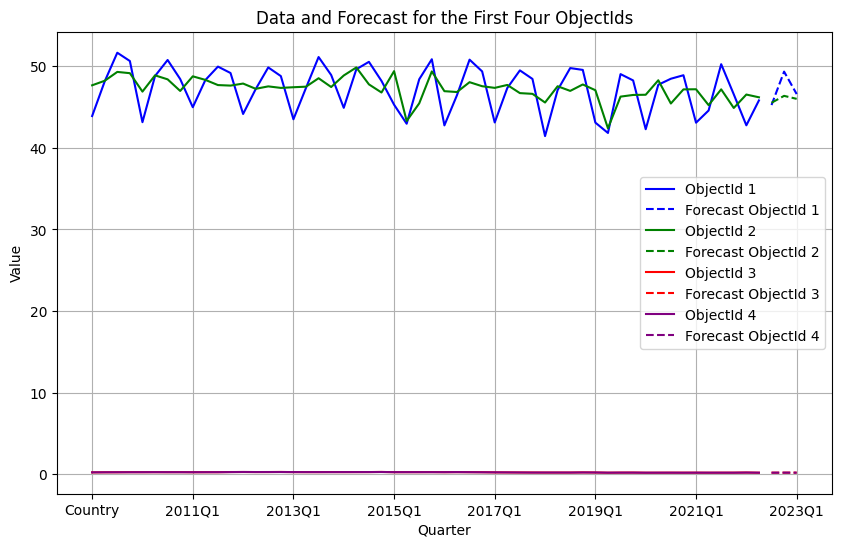

In [64]:
plt.figure(figsize=(10,6))

# Define colors for the plot
colors = ['blue', 'green', 'red', 'purple']

# Plot the data and forecasted quarters for the first four ObjectIds
for i, series_name in enumerate(df.index[:4]):
    # Select the data for the series from 2010Q1 to 2024Q1
    data = df.loc[series_name, '2010Q1':'2023Q2']

    # Create a line plot of the data
    plt.plot(data.index, data.values, label=f'ObjectId {series_name}', color=colors[i])

    # Select the forecasted data for the series
    forecasted_data = df.loc[series_name, '2023Q3':'2024Q1']

    # Create a line plot of the forecasted data
    plt.plot(forecasted_data.index, forecasted_data.values, label=f'Forecast ObjectId {series_name}', color=colors[i], linestyle='--')

plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Data and Forecast for the First Four ObjectIds')
plt.legend()

# Adjust xticks
plt.xticks(np.arange(0, len(df.columns), step=8), df.columns[::8])
plt.grid(True)
plt.show()

### Question 10. **Clustering Industries Based on Greenhouse Gas Emissions Patterns Over Time**
Can we cluster the industries based on their greenhouse gas emissions patterns over time?


This would involve using a machine learning model like K-Means or Hierarchical Clustering to group industries together based on the similarity of their emissions patterns.

Importing KMeans

In [65]:
from sklearn.cluster import KMeans

In [66]:
industries = df['Industry'].unique()
industries = [industry for industry in industries if industry != 'Total Industry and Households']

# Prepare the data for the model
X = []
for industry in industries:
    industry_data = df[df['Industry'] == industry].iloc[:, 5:]  # Select the emissions data columns
    industry_pattern = industry_data.mean(axis=0).values  # Calculate the average emissions pattern for this industry
    X.append(industry_pattern)

# Train the model
model = KMeans(n_clusters=3)  # Choose the number of clusters
model.fit(X)

# Assign each industry to a cluster
clusters = model.predict(X)

# Print the results
for industry, cluster in zip(industries, clusters):
    print(f"The industry {industry} belongs to cluster {cluster}.")


The industry Agriculture, Forestry and Fishing belongs to cluster 0.
The industry Construction belongs to cluster 2.
The industry Electricity, Gas, Steam and Air Conditioning Supply belongs to cluster 1.
The industry Manufacturing belongs to cluster 1.
The industry Mining belongs to cluster 0.
The industry Other Services Industries belongs to cluster 2.
The industry Total Households belongs to cluster 0.
The industry Transportation and Storage belongs to cluster 0.
The industry Water supply; sewerage, waste management and remediation activities belongs to cluster 2.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1000x700 with 0 Axes>

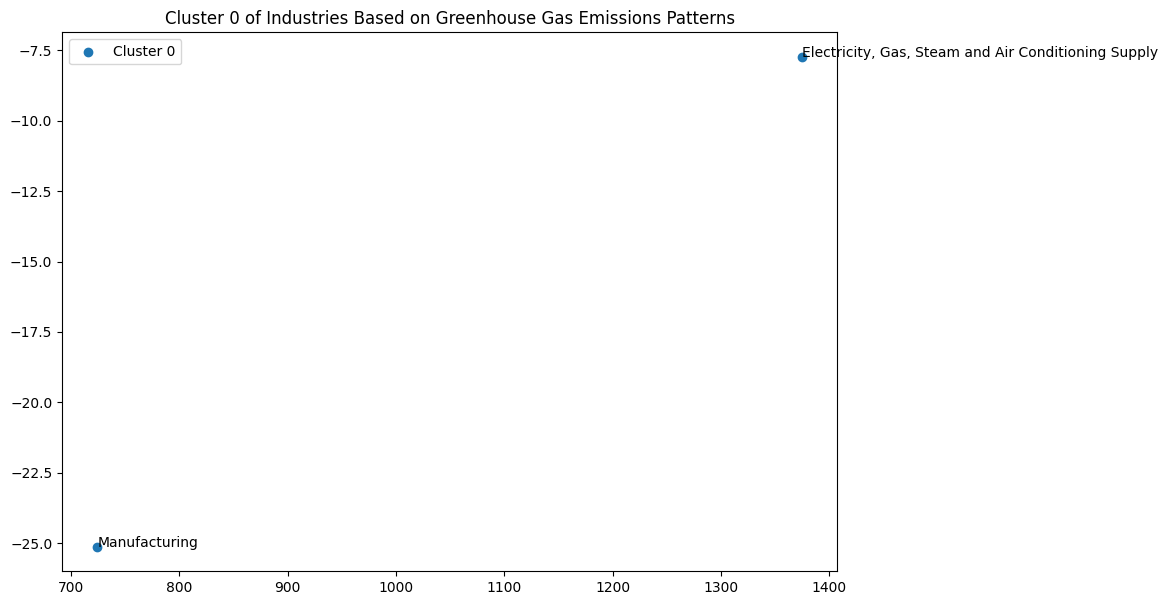

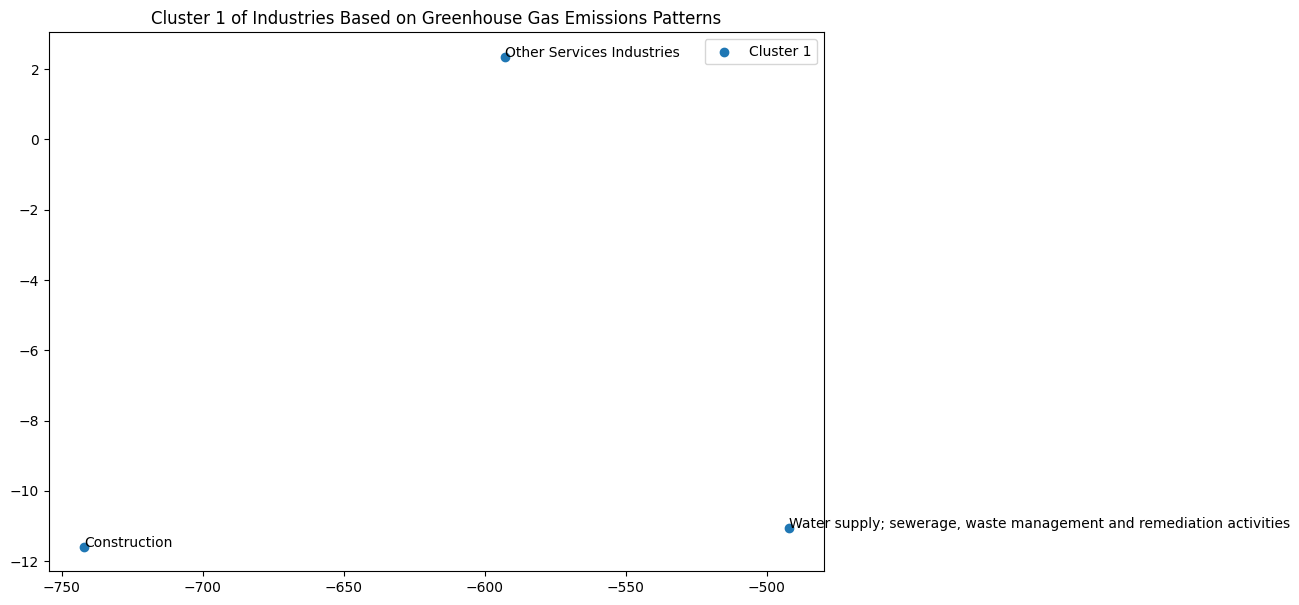

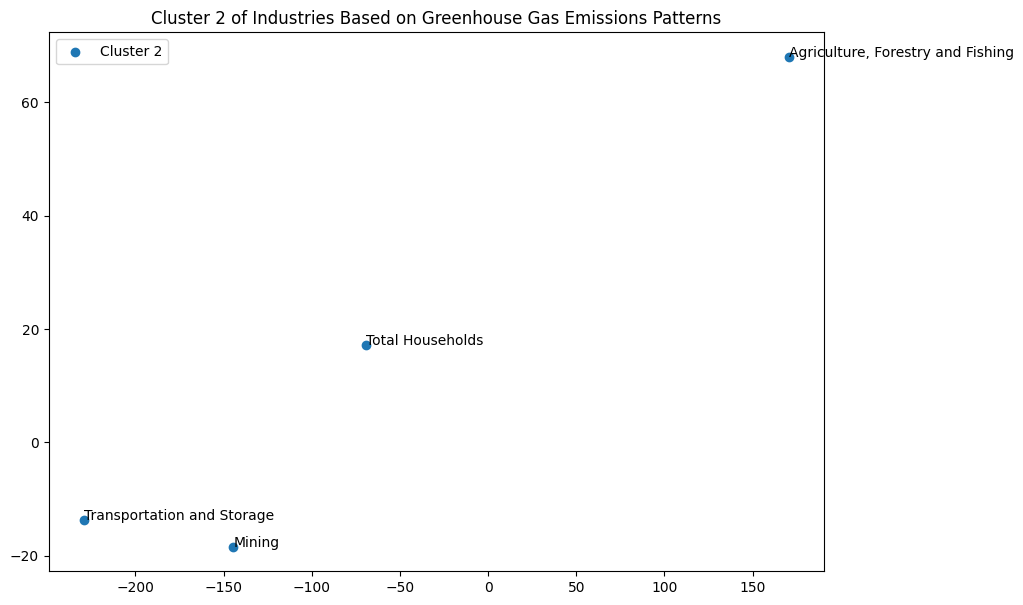

In [69]:
industries = np.array(df['Industry'].unique())

# Exclude 'Total Industry and Households'
industries = industries[industries != 'Total Industry and Households']

plt.figure(figsize=(10, 7))

# Prepare the data for the plot
X = []
for industry in industries:
    industry_data = df[df['Industry'] == industry].iloc[:, 5:]  # Select the emissions data columns
    industry_pattern = industry_data.mean(axis=0).values  # Calculate the average emissions pattern for this industry
    X.append(industry_pattern)

# Train the model
model = KMeans(n_clusters=3)  # Choose the number of clusters
model.fit(X)

# Assign each industry to a cluster
clusters = model.predict(X)

# Convert clusters to a NumPy array
clusters = np.array(clusters)

# Get the unique clusters
unique_clusters = np.unique(clusters)

# Create a separate plot for each cluster
for cluster in unique_clusters:
    plt.figure(figsize=(10, 7))

    # Select the data for this cluster
    cluster_data = X_2d[clusters == cluster]
    cluster_industries = industries[clusters == cluster]

    # Create a scatter plot
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

    # Add labels
    for i, industry in enumerate(cluster_industries):
        plt.annotate(industry, (cluster_data[i, 0], cluster_data[i, 1]))

    plt.title(f'Cluster {cluster} of Industries Based on Greenhouse Gas Emissions Patterns')
    plt.legend()
    plt.show()


## g) Conclusion

Based on the comprehensive analysis conducted, several key insights have been uncovered from the dataset related to greenhouse gas emissions. The process began with the formulation of pertinent research questions, which served as a roadmap for the subsequent exploration of the data. The data, complex and reflective of real-world conditions, was meticulously cleaned, prepared, and wrangled into a form conducive for effective analysis.

Data aggregation and group operations played a crucial role in summarizing and understanding the data at a macro level. By categorizing the data based on certain characteristics, it was possible to reveal patterns and trends that would otherwise remain hidden in the raw, unaggregated data.

The creation of intuitive visualizations facilitated a clear understanding of these patterns and trends. These visualizations not only simplified the complexity of the data but also aided in communicating the findings effectively and supporting decision-making processes.

The application of machine learning methods enabled the prediction of future emissions, identification of significant factors contributing to emissions, and clustering of industries based on their emissions patterns. These insights are not merely of academic interest but can also inform policies and strategies aimed at reducing greenhouse gas emissions.

In conclusion, this analysis underscores the power of data science techniques in extracting insights from complex datasets. The application of skills such as research question formulation, data wrangling, data aggregation, visualization, and machine learning has led to valuable insights into greenhouse gas emissions. These findings highlight potential areas for intervention and pave the way for data-driven strategies in the fight against climate change. This endeavor has been a testament to the transformative potential of data science in addressing real-world challenges.